<a href="https://colab.research.google.com/github/ngotancuong/mse.python/blob/main/Baitap04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment

In [64]:
import numpy as np # các hàm liên quan đại số tuyến tính, xử lý các Tensor
import pandas as pd # module hỗ trợ xử lý dữ liệu dạng Series, DataFrame,..., xử lý file ví dụ CSV file I/O (sử dụng pd.read_csv)
import matplotlib.pyplot as plt # module hỗ trợ vẽ biểu đồ

import time
import math
import datetime as dt
import plotly.express as px
# Đọc Dataset train vào bộ nhớ chính
sell_prices_df = pd.read_csv('https://raw.githubusercontent.com/ngotancuong/mse.python/master/data/input/train.csv')
print("Đọc dữ liệu thành công")

Đọc dữ liệu thành công


In [65]:
# Kiểm tra thông tin dataset train và xuất 5 dòng đầu tiên
sell_prices_df.info()
sell_prices_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


## Câu hỏi 1: Tiền xử lý dữ liệu (xử lý các trường hợp thiếu dữ liệu, chuẩn hóa ngày tháng, đơn vị,...)

In [66]:
# Kiểm tra giá trị NA
sell_prices_df.isna().sum().sort_values(ascending = False)
# Ta phát hiện có 11 trường dữ liệu postal code là NA

Postal Code      11
Row ID            0
Order ID          0
Product Name      0
Sub-Category      0
Category          0
Product ID        0
Region            0
State             0
City              0
Country           0
Segment           0
Customer Name     0
Customer ID       0
Ship Mode         0
Ship Date         0
Order Date        0
Sales             0
dtype: int64

In [67]:
# Fill data '05401' thay thế các dòng dữ liệu null của cột Postal Code
# Tham chiếu postal code tại https://codigo-postal.co/en-us/usa/vermont/bennington/ 
sell_prices_df['Postal Code']=sell_prices_df['Postal Code'].fillna('05401')
# Khử định dạng số lẻ của cột Postal Code
sell_prices_df['Postal Code']=sell_prices_df['Postal Code'].astype(str).replace('\.0', '', regex=True)
sell_prices_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [69]:
# Set định dạng giờ là ngày/tháng/năm và chuyển thành dạng Date
sell_prices_df['Order Date'] = pd.to_datetime(sell_prices_df['Order Date'],format='%d/%m/%Y')
sell_prices_df['Ship Date'] = pd.to_datetime(sell_prices_df['Ship Date'],format='%d/%m/%Y')

In [68]:
# Kiểm tra dữ liệu trùng
sell_prices_df[sell_prices_df.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


## Câu hỏi 2: Vẽ biểu đồ thể hiện biến động doanh số theo tháng. Cho biết doanh thu trung bình trong 3 tháng gần nhất.

In [70]:
# Tách dữ liệu cột Order Date thành ngày, tháng, năm
sell_prices_df['day'] = pd.to_datetime(sell_prices_df['Order Date']).dt.day
sell_prices_df['month'] = pd.to_datetime(sell_prices_df['Order Date']).dt.month
sell_prices_df['year'] = pd.to_datetime(sell_prices_df['Order Date']).dt.year

In [71]:
# Tính tổng doanh số theo tháng
totalsalesofmonth = sell_prices_df.groupby(['month']).sum().sort_values("month",ascending=False)
totalsalesofmonth.reset_index(inplace=True)
totalsalesofmonth

,month,Row ID,Sales,day,year
0,12,6662904,321480.1695,20248,2787094
1,11,7108744,350161.7110,22062,2922156
2,10,3945431,199496.2947,12933,1631565
3,9,6712426,300103.4117,20029,2730652
4,8,3440586,157315.9270,11696,1397545
5,7,3367469,145535.6890,10992,1405652
6,6,3099758,145837.5233,10836,1393591
7,5,3774346,154086.7237,12117,1462180
8,4,3009570,136283.0006,9922,1324950
9,3,3517923,197573.5872,10870,1371361


Text(0, 0.5, 'Doanh số')

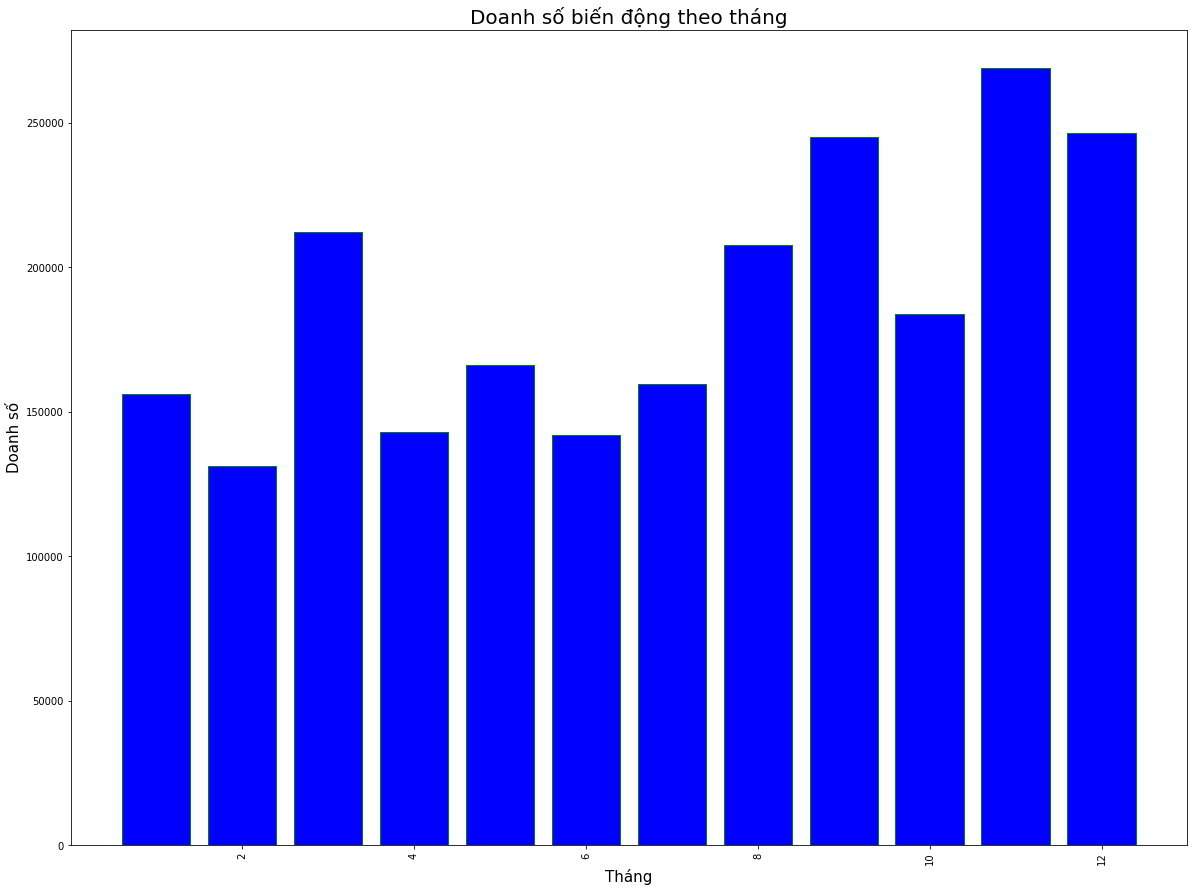

In [111]:
# Biểu đồ thể hiện biến động doanh số theo tháng
plt.figure(figsize=(20,15))
plt.bar(totalsalesofmonth['month'],totalsalesofmonth['Sales'],color='blue',edgecolor='green')
plt.xticks(rotation='vertical')
plt.title('Doanh số biến động theo tháng', fontsize=20)
plt.xlabel('Tháng',fontsize=15)
plt.ylabel('Doanh số',fontsize=15)

In [114]:
# Lấy ra doanh số 3 tháng cuối năm 2018
total_sell_prices_3months_df=sell_prices_df[sell_prices_df['year']==2018].loc[:,['month','Sales']].groupby(['month']).sum().sort_values("month",ascending=False).head(3)
# Doanh số trung bình 3 tháng 10,11,12 năm 2018
total_sell_prices_3months_df.mean(axis=0).round(2)

Sales    70152.68
dtype: float64

## Câu hỏi 3: Vẽ biểu đồ doanh số bán hàng theo quý và cho biết quý nào có tổng doanh số cao nhất?

In [115]:
d = {1:'Q1', 2:'Q1',3:'Q1',
     4:'Q2',5:'Q2',6:'Q2',
     7:'Q3',8:'Q3',9:'Q3', 
     10:'Q4',11:'Q4',12:'Q4'}

sell_prices_quater_df = sell_prices_df.groupby(sell_prices_df['month'].map(d).rename('Qtr')).sum().reset_index()
sell_prices_quater_df

,Qtr,Row ID,Sales,day,month,year
0,Q1,9564194,499400.3092,26572,4038,3848101
1,Q2,10603730,451019.7661,34669,10958,4422681
2,Q3,13012736,612229.4475,43281,21504,5322091
3,Q4,14844240,698887.2599,53446,33924,6171024


Text(0, 0.5, 'Doanh số')

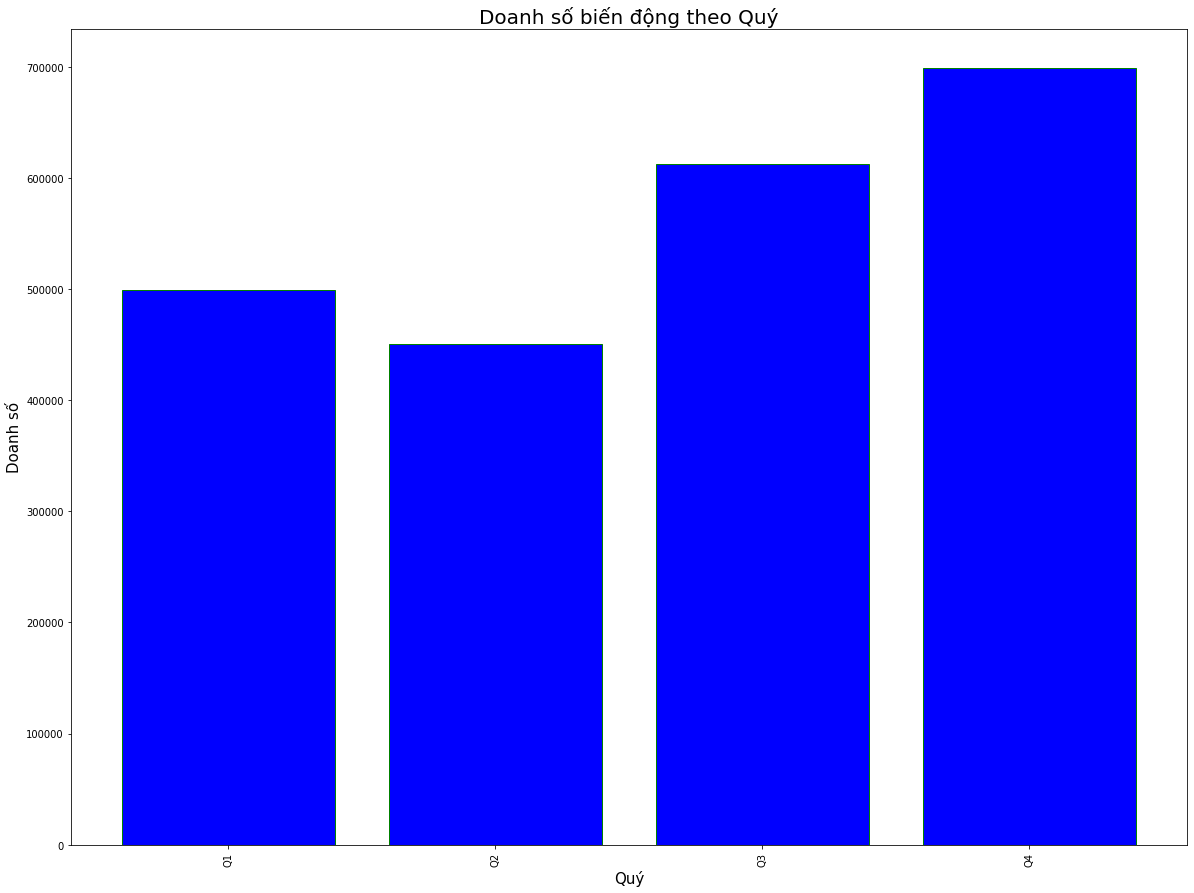

In [119]:
# Biểu đồ thể hiện biến động doanh số theo Quý
plt.figure(figsize=(20,15))
plt.bar(sell_prices_quater_df['Qtr'],sell_prices_quater_df['Sales'],color='blue',edgecolor='green')
plt.xticks(rotation='vertical')
plt.title('Doanh số biến động theo Quý', fontsize=20)
plt.xlabel('Quý',fontsize=15)
plt.ylabel('Doanh số',fontsize=15)

In [158]:
# Quý có doanh thu cao nhất
sell_prices_quater_df.sort_values('Sales',ascending=False).head(1)

,Qtr,Row ID,Sales,day,month,year
3,Q4,14844240,698887.2599,53446,33924,6171024


## Câu hỏi 4: Tính thời gian giao hàng trung bình (ship date - order date) theo từng tháng và vẽ biểu đồ mô tả sự biến thiên của con số này.

In [20]:
ship_df=sell_prices_df
ship_df['DateYM'] = ship_df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
ship_df['ship']=ship_df['Ship Date']-ship_df['Order Date']
# Gom nhóm thời gian giao hàng theo Năm-Tháng rồi tính trung bình. Sau đó dùng to_frame() để chuyền Series thành Daraframe và reset_index lại Dataframe
mean_ship_df= ship_df.groupby('DateYM')['ship'].mean().to_frame().reset_index()
#ship_df=sell_prices_df.loc[:,['month','ship']]
#ship_df1=ship_df.groupby('month', as_index = False)['ship'].mean().to_frame().reset_index()
#ship_df1['ship']

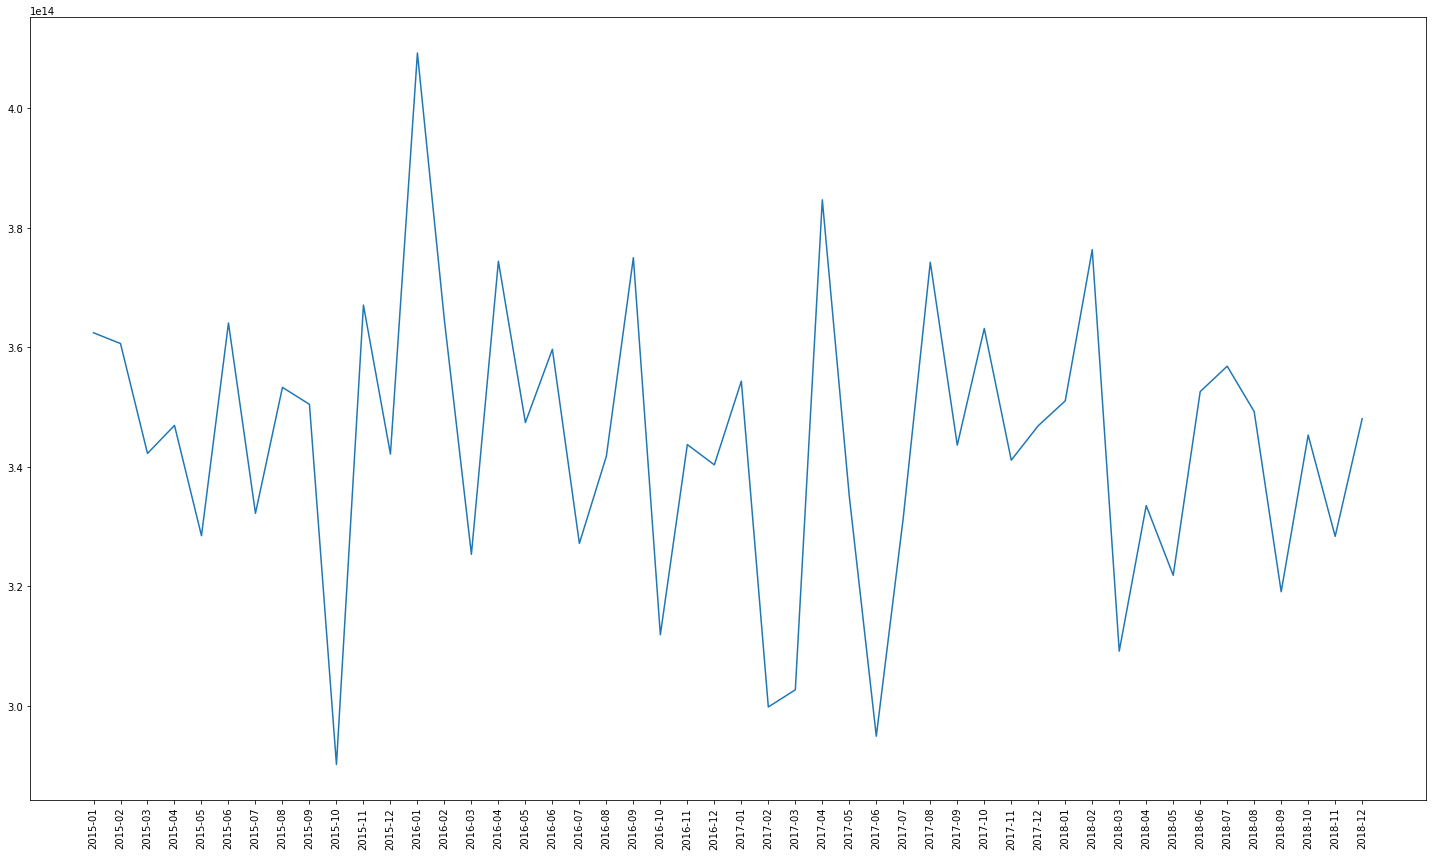

In [25]:
# Vẽ biểu đồ xu hướng
plt.rcParams["figure.figsize"] = [20, 12]
plt.rcParams["figure.autolayout"] = True
x = mean_ship_df['DateYM']
y = mean_ship_df['ship']
# xoay label trục x theo phương đứng
plt.xticks(rotation='vertical')
plt.plot(x, y)
plt.show()

## Câu hỏi 5: Vẽ biểu đồ thể hiện sức mua theo từng thành phố. Cho biết top 3 thành phố có doanh số thấp nhất và 3 thành phố có doanh số cao nhất.

In [323]:
sell_city_df=sell_prices_df.groupby('City')['Sales'].sum().reset_index()
sell_city_df.sort_values('Sales',ascending=False).head(20)

,City,Sales
327,New York City,252462.547
265,Los Angeles,173420.181
450,Seattle,116106.322
436,San Francisco,109041.120
372,Philadelphia,108841.749
...,...,...
356,Oxnard,1558.100
289,Meriden,1550.680
371,Pharr,1540.708
299,Miramar,1531.192


Text(0, 0.5, 'Doanh số')

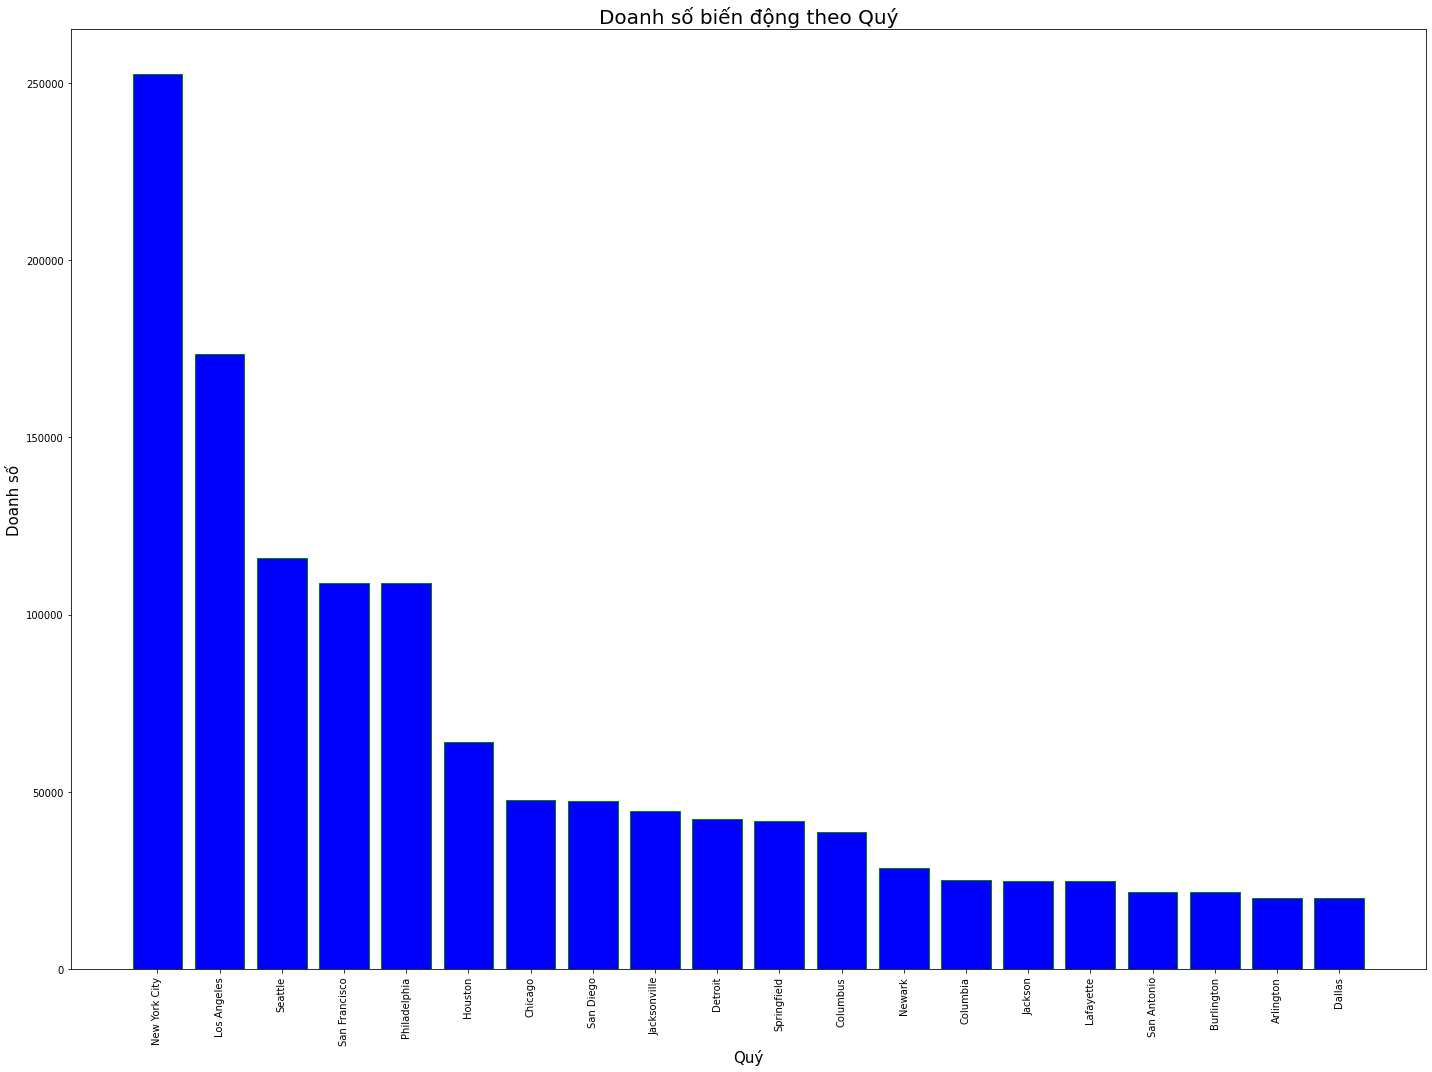

In [320]:
# Đếm sản phẩm có phát sinh giao dịch gom nhóm theo category và state, đưa vào data frame
#df = train_sales_df.groupby(['state_id', 'cat_id'])['id'].count().reset_index(name='num_sales_by_category')
sell_city_df=sell_prices_df.groupby('City')['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
sell_20city_df=sell_city_df.head(20)
plt.figure(figsize=(20,15))
plt.bar(sell_20city_df['City'],sell_20city_df['Sales'],color='blue',edgecolor='green')
plt.xticks(rotation='vertical')
plt.title('Doanh số biến động theo Quý', fontsize=20)
plt.xlabel('Quý',fontsize=15)
plt.ylabel('Doanh số',fontsize=15)

In [321]:
sell_city_df.head(3)

,City,Sales
327,New York City,252462.547
265,Los Angeles,173420.181
450,Seattle,116106.322


In [322]:
sell_city_df.tail(3)

,City,Sales
221,Jupiter,2.064
140,Elyria,1.824
1,Abilene,1.392


## Câu 6: Vẽ biểu đồ thể hiện tỉ trọng doanh số theo bang (state) và cho biết trung bình doanh số của 5 bang dẫn đầu về sức mua.

In [325]:
sell_state_df=sell_prices_df.groupby('State')['Sales'].sum().reset_index()
sell_state_df.sort_values('Sales',ascending=False)

,State,Sales
3,California,446306.4635
30,New York,306361.1470
41,Texas,168572.5322
45,Washington,135206.8500
36,Pennsylvania,116276.6500
8,Florida,88436.5320
11,Illinois,79236.5170
20,Michigan,76136.0740
33,Ohio,75130.3500
44,Virginia,70636.7200


Text(0, 0.5, 'Doanh số')

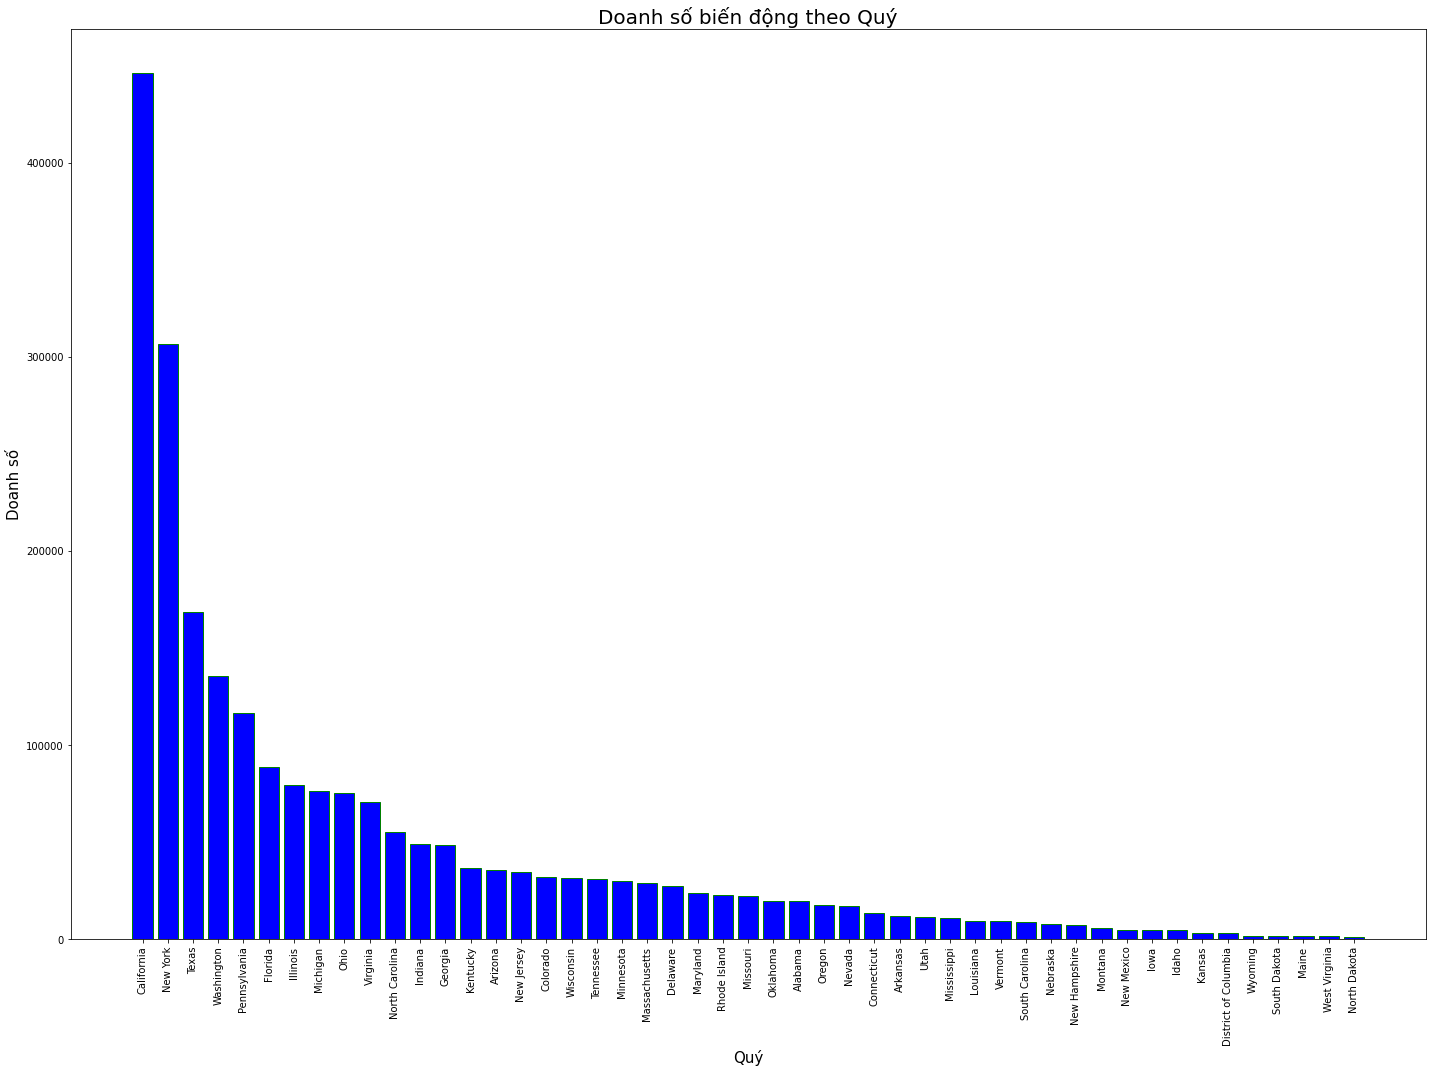

In [326]:
# Đếm sản phẩm có phát sinh giao dịch gom nhóm theo category và state, đưa vào data frame
#df = train_sales_df.groupby(['state_id', 'cat_id'])['id'].count().reset_index(name='num_sales_by_category')
sell_state_df=sell_state_df.groupby('State')['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
plt.figure(figsize=(20,15))
plt.bar(sell_state_df['State'],sell_state_df['Sales'],color='blue',edgecolor='green')
plt.xticks(rotation='vertical')
plt.title('Doanh số biến động theo Quý', fontsize=20)
plt.xlabel('Quý',fontsize=15)
plt.ylabel('Doanh số',fontsize=15)

In [329]:
sell_state_df.head(5).mean().round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Sales    234544.73
dtype: float64

## Câu hỏi 7: Cho biết các bang dẫn đầu doanh số theo từng vùng (east, west, south, central,..).

In [16]:
sell_region_df=sell_prices_df.groupby(['Region','State'])['Sales'].sum().reset_index().sort_values(['Region','Sales'],ascending=False)
sell_region_df.drop_duplicates(subset = "Region")

,Region,State,Sales
39,West,California,446306.4635
29,South,Florida,88436.5320
21,East,New York,306361.1470
11,Central,Texas,168572.5322


## Câu hỏi 8: Cho biết top 3 sản phẩm có doanh thu cao nhất và top 3 sản phẩm có số lượng đơn vị bán ra cao nhất.

In [35]:
# Tính tổng doanh số theo mã và tên sản phẩm
product_top_df=sell_prices_df.groupby(['Product ID','Product Name'])['Sales'].sum().reset_index().sort_values('Sales',ascending=False)
product_top_df.head(3)

,Product ID,Product Name,Sales
1639,TEC-CO-10004722,Canon imageCLASS 2200 Advanced Copier,61599.824
787,OFF-BI-10003527,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
1668,TEC-MA-10002412,Cisco TelePresence System EX90 Videoconferenci...,22638.480


In [42]:
# Đếm số lượng sản phẩm được bán ra theo từng mã và tên sản phẩm
product_sell_df=sell_prices_df.groupby(['Product ID','Product Name'])['Sales'].count().reset_index().sort_values('Sales',ascending=False)
product_sell_df.head(3)

,Product ID,Product Name,Sales
95,FUR-CH-10002647,"Situations Contoured Folding Chairs, 4/Set",15
1590,TEC-AC-10003628,Logitech 910-002974 M325 Wireless Mouse for We...,15
704,OFF-BI-10001524,GBC Premium Transparent Covers with Diagonal L...,14


## Câu hỏi 9: Vẽ biểu đồ thể hiện tỉ trọng doanh số của từng category

In [72]:
category_sell_df=sell_prices_df.groupby('Category')['Sales'].sum().reset_index(name='total').sort_values('total',ascending=False)
# Hàm vẽ biểu đồ hình bánh
fig = px.pie(category_sell_df, values='total', names='Category', 
            color_discrete_sequence=px.colors.sequential.Tealgrn_r,
            width = 750, height=450, title = 'Tỉ trọng doanh số của từng category')
fig.show()

## Câu hỏi 10: Dự báo doanh số theo nhiều khía cạnh khác nhau trong tương lai: theo vùng, theo bang, theo category,..  và phát hành API để khai thác.